# Background

Diabetes adalah kondisi di mana tubuh tidak
dapat memproduksi atau menggunakan
insulin dengan efektif, menyebabkan
tingginya kadar gula (glukosa) dalam darah.
Hal ini terjadi ketika tubuh tidak mampu
memproduksi atau menggunakan insulin
dengan efektif.







# Objective

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from keras.models import Sequential
from keras.layers import Dense

# EDA & Data Preparation

In [4]:
df = pd.read_csv('./Data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Atribut Glucose, BloodPressure, SkinThickness, Insulin, dan BMI terindikasi missing values.



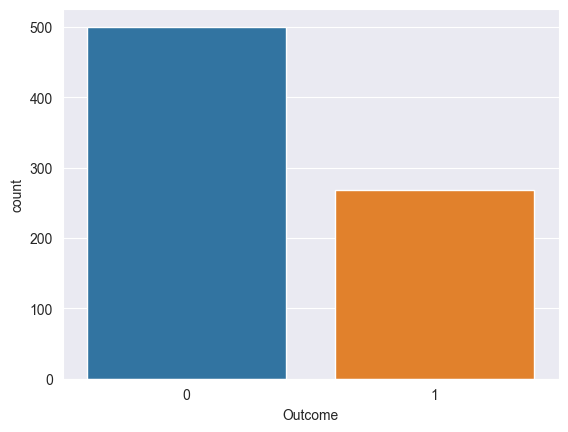

In [7]:
sns.countplot(x = df['Outcome'])
plt.show()

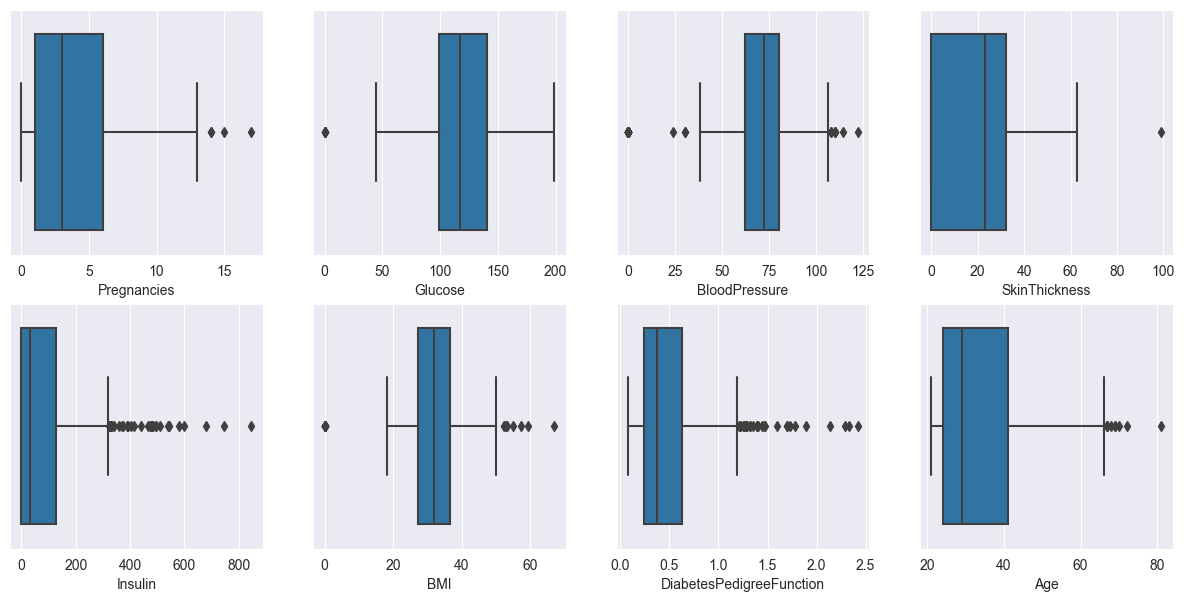

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(15,7))

sns.boxplot(data=df, x='Pregnancies', ax=axes[0,0])
sns.boxplot(data=df, x='Glucose', ax=axes[0,1])
sns.boxplot(data=df, x='BloodPressure', ax=axes[0,2])
sns.boxplot(data=df, x='SkinThickness', ax=axes[0,3])
sns.boxplot(data=df, x='Insulin', ax=axes[1,0])
sns.boxplot(data=df, x='BMI', ax=axes[1,1])
sns.boxplot(data=df, x='DiabetesPedigreeFunction', ax=axes[1,2])
sns.boxplot(data=df, x='Age', ax=axes[1,3])

plt.show()

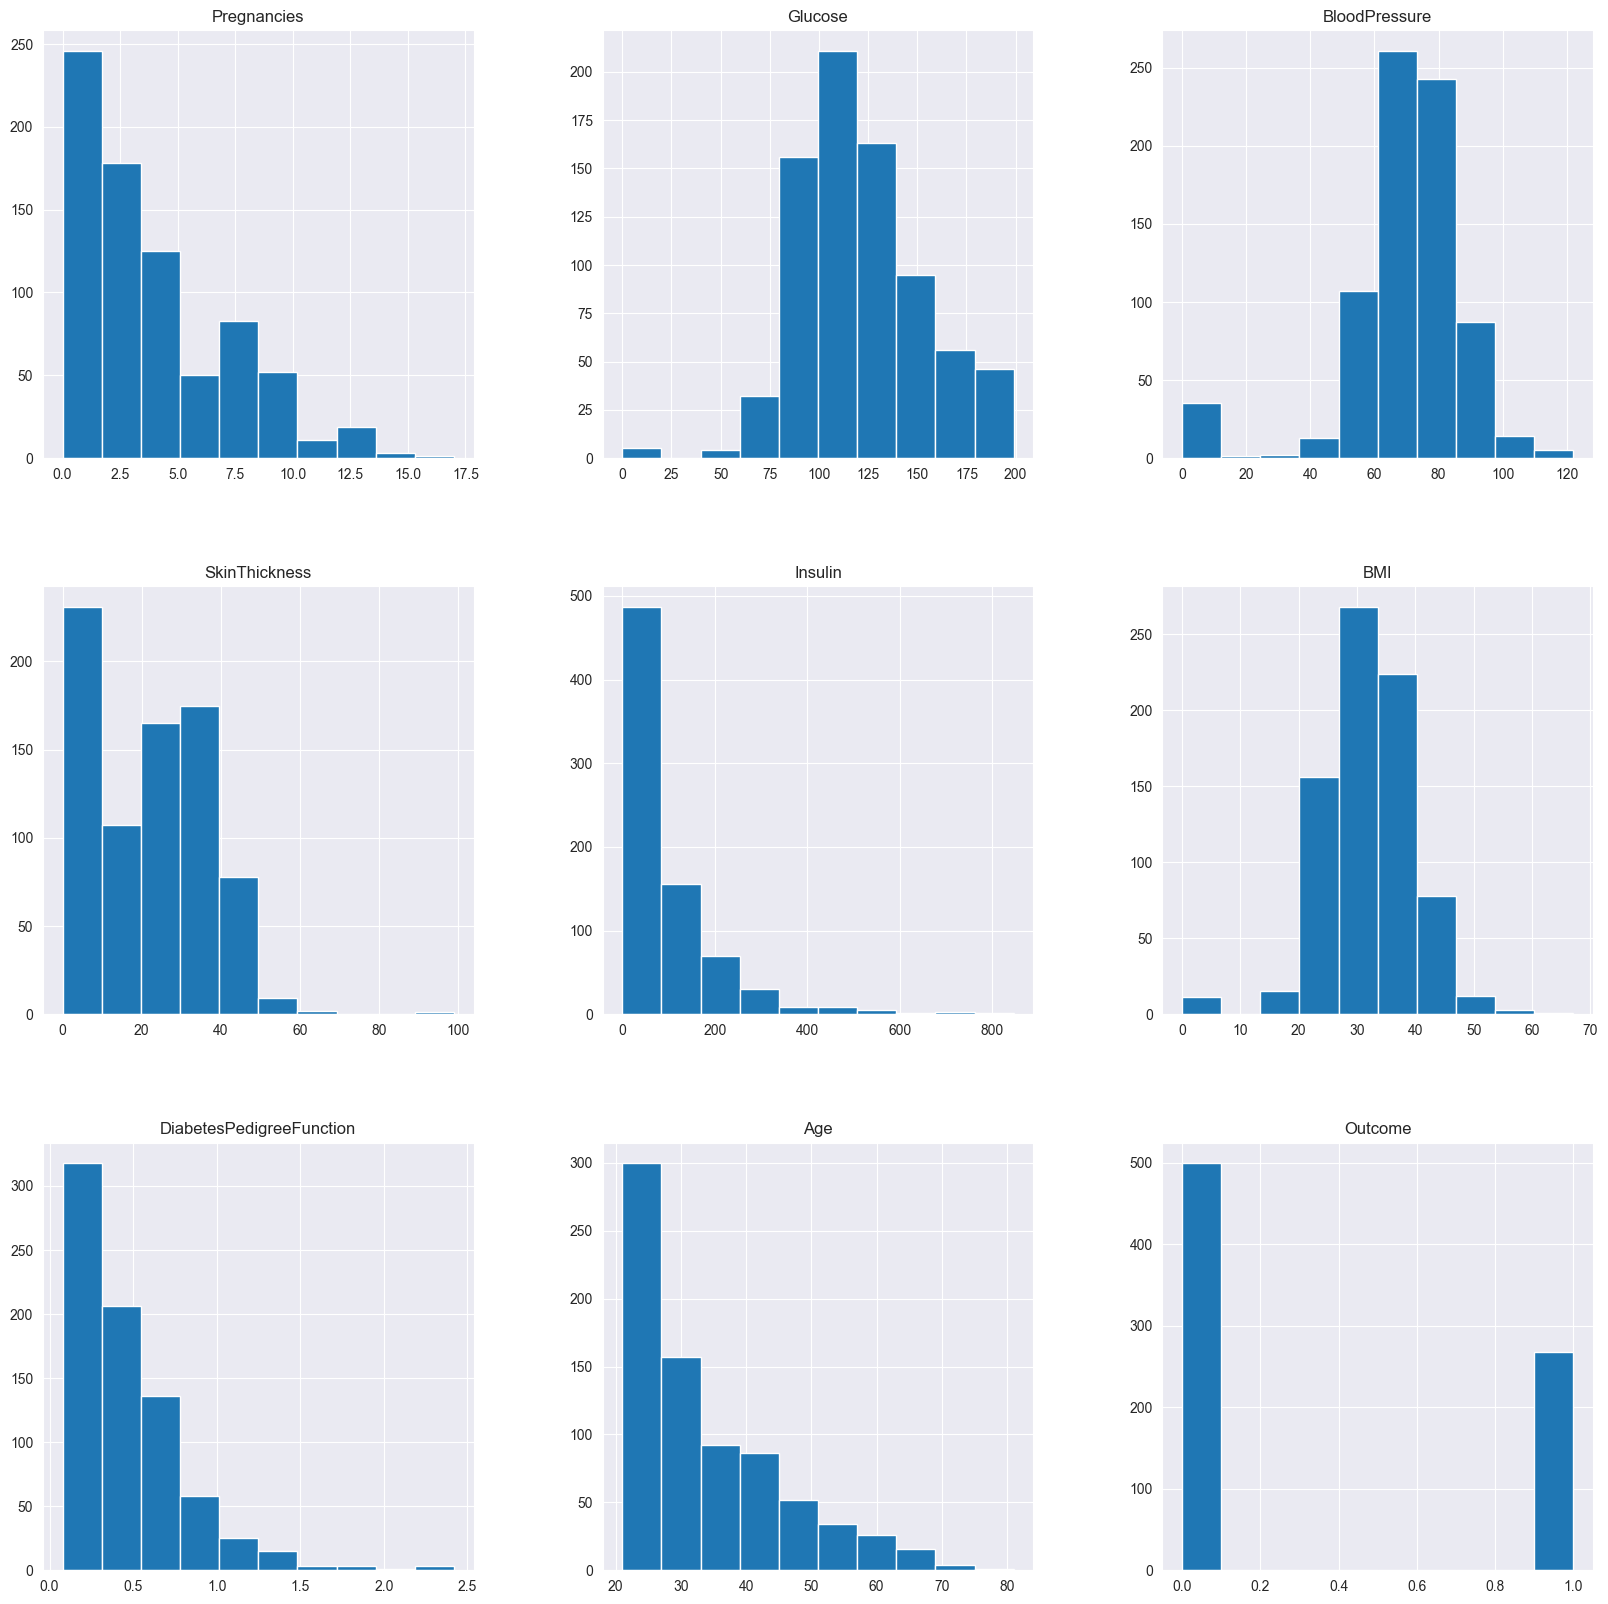

In [9]:
df.hist(figsize = (20,20))
plt.show()

In [51]:
# Mengubah nilai 0 menjadi NaN
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

In [52]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Handling Missing Values

In [53]:
def check_median(cols):
  result = pd.DataFrame(columns=['Outcome'])
  for col in cols:
    median_val = df[df[col].notnull()][[col, 'Outcome']].groupby(['Outcome']).median()
    result = pd.merge(result, median_val, how='right', on=['Outcome'])
  return result

In [54]:
check_median(['Glucose','BloodPressure','SkinThickness','Insulin', 'BMI'])

,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,0,107.0,70.0,27.0,102.5,30.1
1,1,140.0,74.5,32.0,169.5,34.3


In [55]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

# Split Dataset

In [10]:
features = df.iloc[:, :-1]
labels = df['Outcome']

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

In [12]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [13]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(614, 8) (614,)
(154, 8) (154,)


# Build Model

In [14]:
# define the keras sequential model
model = Sequential()

In [15]:
model.add(Dense(8, input_dim=8, activation='relu')) # input layer + 1st hidden layer
model.add(Dense(8, activation='relu')) # 2nd hidden layer 
model.add(Dense(8, activation='relu')) # 2nd hidden layer 
model.add(Dense(1, activation='sigmoid')) # output layer

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model

In [19]:
# fit the keras model on the dataset
model.fit(xtrain, ytrain, epochs=100, batch_size=8)

Epoch 1/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8436
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8518
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8453
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8502
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8436
Epoch 6/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8518
Epoch 7/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8534
Epoch 8/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8502
Epoch 9/100
77/77 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.8550
Epoch 10/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8485
Epoch 11/

# Plot Accuracy & Evaluate Model

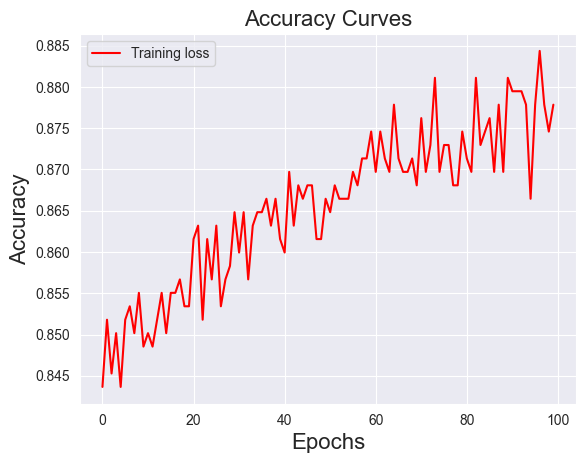

In [20]:
# plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [21]:
# evaluate the keras model
_, accuracy = model.evaluate(xtest, ytest, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 74.03


In [22]:
ypred = model.predict(xtest)

5/5 [==============================] - 0s 2ms/step


In [23]:
classes = np.round(ypred).reshape(-1)

In [24]:
print(classification_report(ytest, classes))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.61      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



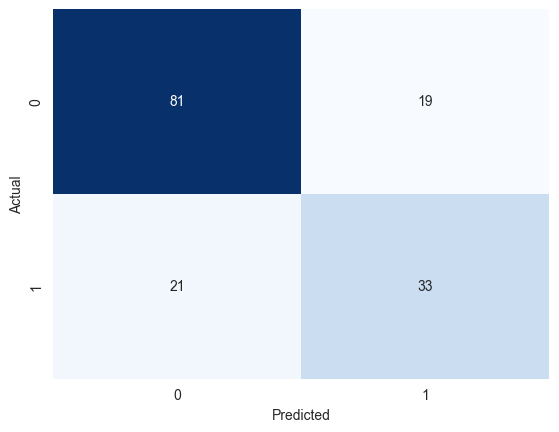

In [25]:
sns.heatmap(confusion_matrix(ytest, classes), annot=True, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
!mkdir Artifacts

In [27]:
import pickle
with open('./Artifacts/model.bin', 'wb') as f_out:
    pickle.dump(model, f_out)
with open('./Artifacts/scaler.bin', 'wb') as f_out:
    pickle.dump(scaler, f_out)


NotFoundError: {{function_node __wrapped__SaveV2_dtypes_31_device_/job:localhost/replica:0/task:0/device:CPU:0}} Failed to create a NewWriteableFile: Artifacts/my_model\variables\variables_temp/part-00000-of-00001.data-00000-of-00001.tempstate8109831845108795328 : The system cannot find the path specified.
; No such process [Op:SaveV2]